In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
dat = pd.read_csv("dataa.csv")
dat = dat.drop(["recordID","customer_id"], axis=1)

In [3]:
#checking for missing values
dat.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

No missing values found.

In [4]:
dat.dtypes

state                             object
account_length                     int64
area_code                          int64
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [7]:
bardat=dat["state"].value_counts()

In [13]:
bardat[0:5]

WV    402
MN    326
AL    320
NY    306
OR    299
Name: state, dtype: int64

In [14]:
type(bardat)

pandas.core.series.Series

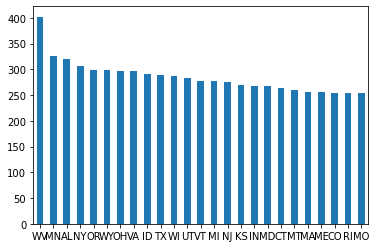

In [20]:
bardat[0:25].plot.bar(rot=0)
plt.savefig('state1.png')

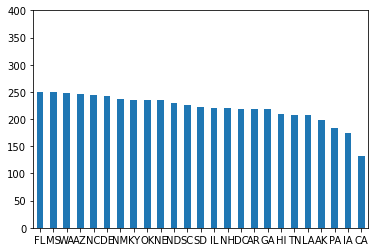

In [23]:
bardat[26:].plot.bar(ylim=(0,400), rot=0)
plt.savefig('state2.png')

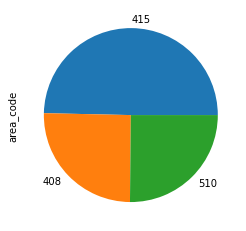

In [35]:
dat["area_code"].value_counts().plot.pie()
plt.savefig('area_code.png')

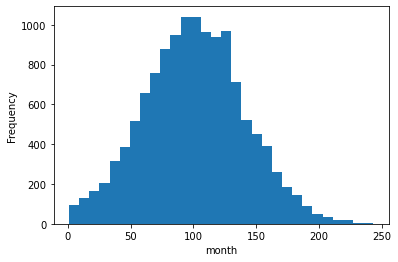

In [45]:
dat["account_length"].plot.hist(bins=30).set_xlabel("month")
plt.savefig('account_length.png')

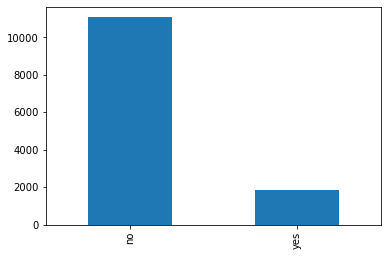

In [38]:
dat["churn"].value_counts().plot.bar()
plt.savefig('churn.png')

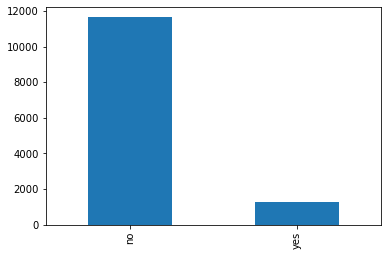

In [42]:
dat["international_plan"].value_counts().plot.bar()
plt.savefig('international_plan.png')

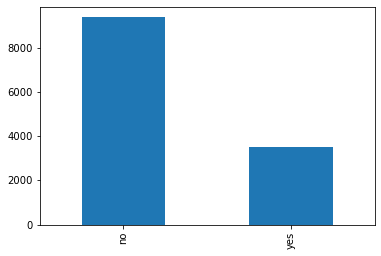

In [43]:
dat["voice_mail_plan"].value_counts().plot.bar()
plt.savefig('voice_mail_plan')

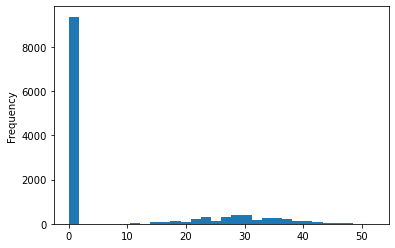

In [51]:
dat["number_vmail_messages"].plot.hist(bins=30)
plt.savefig('number_vmail_messages.png')

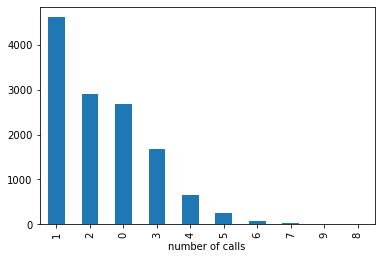

In [58]:
dat["number_customer_service_calls"].value_counts().plot.bar().set_xlabel("number of calls")
plt.savefig('number_customer_service_calls.png')

<AxesSubplot:ylabel='Frequency'>

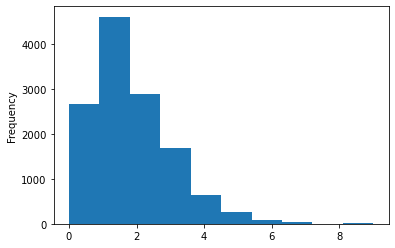

In [54]:
dat["number_customer_service_calls"].plot.hist(bins=10)

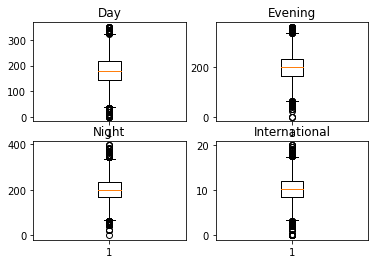

In [72]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].boxplot(dat["total_day_minutes"])
axs[0, 0].set_title('Day')
axs[0, 1].boxplot(dat["total_eve_minutes"])
axs[0, 1].set_title('Evening')
axs[1, 0].boxplot(dat["total_night_minutes"])
axs[1, 0].set_title('Night')
axs[1, 1].boxplot(dat["total_intl_minutes"])
axs[1, 1].set_title('International')
plt.savefig('total_minutes.png')

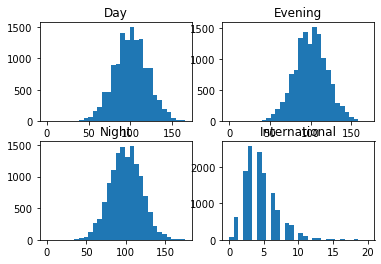

In [77]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(dat["total_day_calls"],bins=30)
axs[0, 0].set_title('Day')
axs[0, 1].hist(dat["total_eve_calls"],bins=30)
axs[0, 1].set_title('Evening')
axs[1, 0].hist(dat["total_night_calls"],bins=30)
axs[1, 0].set_title('Night')
axs[1, 1].hist(dat["total_intl_calls"],bins=30)
axs[1, 1].set_title('International')
plt.savefig('total_calls.png')

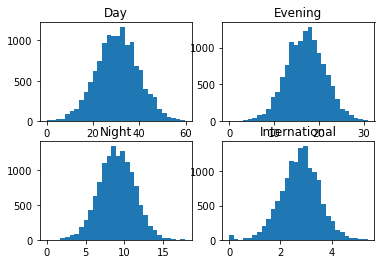

In [79]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(dat["total_day_charge"],bins=30)
axs[0, 0].set_title('Day')
axs[0, 1].hist(dat["total_eve_charge"],bins=30)
axs[0, 1].set_title('Evening')
axs[1, 0].hist(dat["total_night_charge"],bins=30)
axs[1, 0].set_title('Night')
axs[1, 1].hist(dat["total_intl_charge"],bins=30)
axs[1, 1].set_title('International')
plt.savefig('total_charges.png')

Text(0.5, 1.0, 'International')

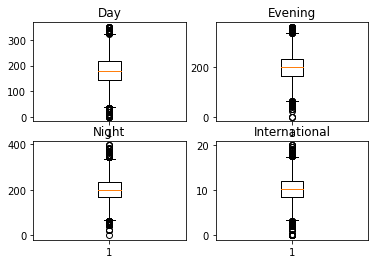

In [2]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.model_selection import train_test_split

In [3]:
features = dat.drop(["churn"], axis=1)
target = dat["churn"]

In [4]:
X_main, X_test, y_main, y_test = train_test_split(
    features, target, test_size=0.2, random_state=7)
X_train, X_val, y_train, y_val = train_test_split(
    X_main, y_main, test_size=0.25, random_state=12)

In [12]:
y_test.value_counts()

no     2177
yes     402
Name: churn, dtype: int64

In [6]:
y_naive=pd.Series(['no']*2579)

In [7]:
#accuracy
accuracy_score(y_test,y_naive)

0.8441256300891818

In [25]:
average_precision_score(y_test.map(dict(yes=1, no=0)), y_naive.map(dict(yes=1, no=0)))

0.15587436991081816

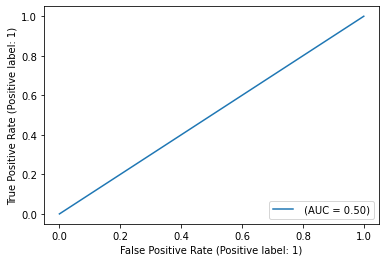

In [31]:
RocCurveDisplay.from_predictions(y_test.map(dict(yes=1, no=0)), y_naive.map(dict(yes=1, no=0)), name="");
plt.savefig('RoC.png')

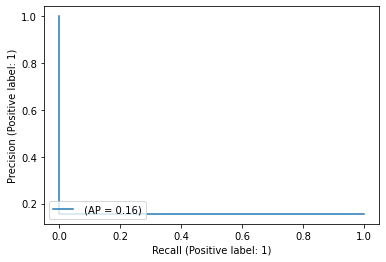

In [30]:
PrecisionRecallDisplay.from_predictions(y_test.map(dict(yes=1, no=0)), y_naive.map(dict(yes=1, no=0)), name="");
plt.savefig('Pr.png')

In [27]:
roc_auc_score(y_test.map(dict(yes=1, no=0)), y_naive.map(dict(yes=1, no=0)))

0.5

In [41]:
import tensorflow as tf
bce = tf.keras.losses.BinaryCrossentropy(label_smoothing=0)

In [2]:
from pathlib import Path
if not Path("customer_data_edited.csv").exists():
  print("Downloading dataset...")
  !wget https://data.world/bob-wakefield/call-center-data/customer_data_edited.csv
else:
  print("Already downloaded.")

Already downloaded.


In [43]:
a=tf.convert_to_tensor(y_test.map(dict(yes=[0,1], no=[1,0])))

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).